

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Breast Tumor 🩺🎗️</h2>

In [20]:
from IPython.display import Image, display

# Display the image with adjusted width and height
display(Image(
    url="https://media.istockphoto.com/id/1632764054/photo/pink-october-breast-cancer-awareness-month-doctor-with-pink-ribbon-in-hospital-for-support.webp?a=1&b=1&s=612x612&w=0&k=20&c=1sMwl8q42yM9zpdJ4QobXiHmcG8PbtZIpbpyBZw4xmc=",
    width=500,  # Adjust width (in pixels)
    height=350  # Adjust height (in pixels)
))


<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">"Enhancing Diagnostic Precision: Advanced Image Restoration Techniques for Breast Tumor Analysis" 🩺🎗️</h2>

<p>The primary objective of this project was to apply advanced image processing techniques to enhance the quality of medical images, focusing on:</p>

<ul>
  <li><strong>Noise Reduction</strong> 🌊❌</li>
  <li><strong>Contrast Enhancement</strong> 🌞📊</li>
  <li><strong>Feature Extraction</strong> 🔍📐</li>
</ul>

<p>These enhancements aim to aid in <strong>accurate diagnosis and analysis</strong> within the medical imaging domain. Additionally, the integration of cutting-edge technologies emphasizes the role of image restoration in improving healthcare outcomes.</p>

</div>




<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Data Preprocessing</h2>

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from scipy.signal import convolve2d
from skimage.metrics import structural_similarity as ssim
from skimage.feature import hog
from skimage import exposure
from skimage.morphology import opening, closing, square

# Paths to the dataset
dataset_path = 'C:/Users/Acer/Downloads/Project_DIP/Breast_tumor'
early_phase_path = os.path.join(dataset_path, 'Early_Phase')
middle_phase_path = os.path.join(dataset_path, 'Middle_Phase')
critical_phase_path = os.path.join(dataset_path, 'Critical_Phase')

# Resize images to a common size (224x224)
img_size = (224, 224)

# Function to load images and convert to grayscale
def load_and_preprocess_images(folder_path, img_size=(224, 224)):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = image.load_img(img_path, target_size=img_size)  # Resize the image
        img_array = img_to_array(img)  # Convert to numpy array
        gray_img = cv2.cvtColor(img_array.astype('uint8'), cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        images.append(gray_img)
        filenames.append(filename)
    return np.array(images), filenames


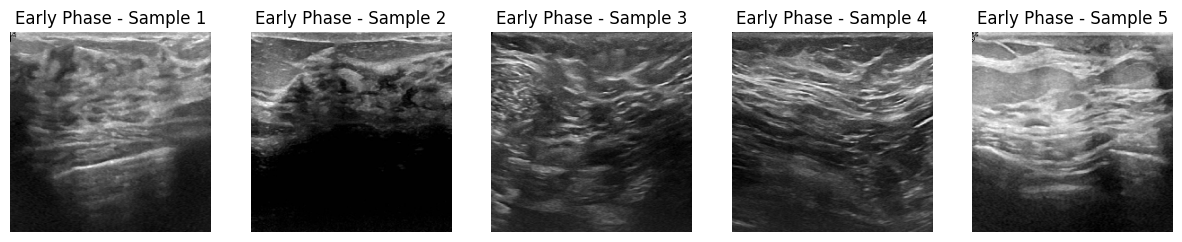

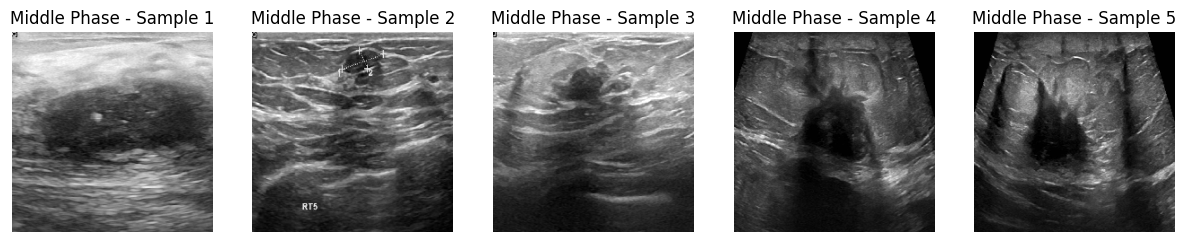

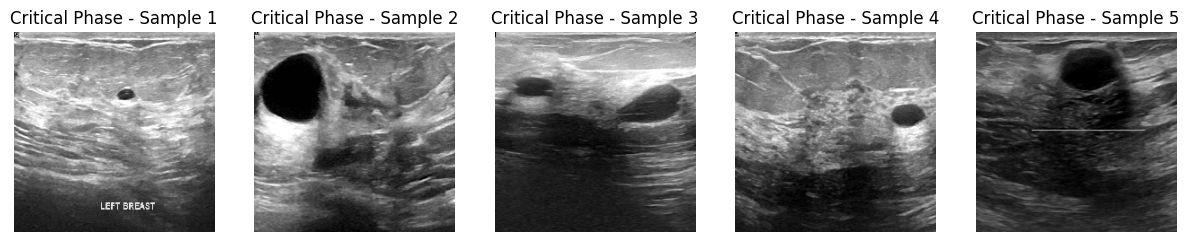

In [5]:
# Load and preprocess images from each phase
early_phase_images, early_phase_filenames = load_and_preprocess_images('C:/Users/Acer/Downloads/Project_DIP/Breast_tumor/Early_Phase')
middle_phase_images, middle_phase_filenames = load_and_preprocess_images('C:/Users/Acer/Downloads/Project_DIP/Breast_tumor/Middle_Phase')
critical_phase_images, critical_phase_filenames = load_and_preprocess_images('C:/Users/Acer/Downloads/Project_DIP/Breast_tumor/Critical_Phase')

# Visualize some sample images from each phase
def visualize_samples(images, phase, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(f'{phase} - Sample {i+1}')
    plt.show()

# Visualize samples from each phase
visualize_samples(early_phase_images, "Early Phase")
visualize_samples(middle_phase_images, "Middle Phase")
visualize_samples(critical_phase_images, "Critical Phase")



<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Noise Reduction (Gaussian Smoothing)</h2>

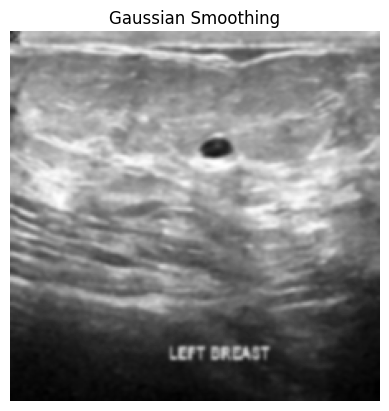

In [6]:
#### Noise Reduction - Gaussian Smoothing
def gaussian_smoothing(image, kernel_size=(5, 5), sigma=1):
    return cv2.GaussianBlur(image, kernel_size, sigma)

# Example for early phase
gaussian_smoothed_img = gaussian_smoothing(critical_phase_images[0])
plt.imshow(gaussian_smoothed_img, cmap='gray')
plt.title('Gaussian Smoothing')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Contrast Enhancement - (Histogram Equalization)</h2>

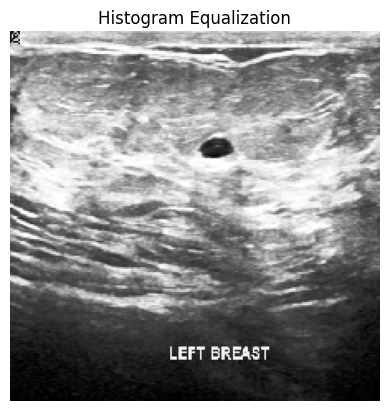

In [7]:
#### Contrast Enhancement - Histogram Equalization
def histogram_equalization(image):
    return cv2.equalizeHist(image)

# Example for early phase
hist_equalized_img = histogram_equalization(critical_phase_images[0])
plt.imshow(hist_equalized_img, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Edge Sharpening - (Unsharp Mask)</h2>

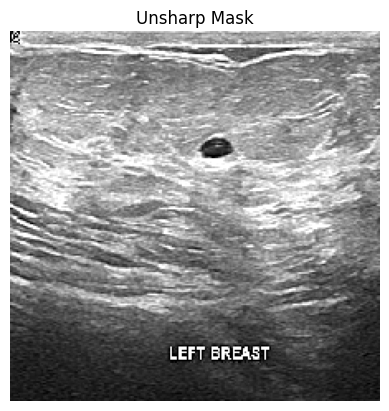

In [8]:
#### Edge Sharpening - Unsharp Mask
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1 + strength, blurred, -strength, 0)
    return sharpened

# Example for early phase
unsharp_img = unsharp_mask(critical_phase_images[0])
plt.imshow(unsharp_img, cmap='gray')
plt.title('Unsharp Mask')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Deblurring - (Wiener Filtering)</h2>

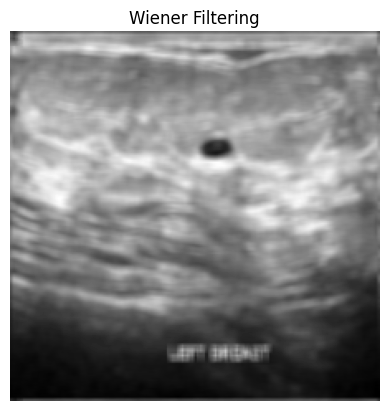

In [9]:
#### Deblurring - Wiener Filtering
def wiener_filter(image, kernel_size=5, noise_var=0.1):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    blurred = convolve2d(image, kernel, mode='same', boundary='wrap')
    return blurred

# Example for early phase
wiener_filtered_img = wiener_filter(critical_phase_images[0])
plt.imshow(wiener_filtered_img, cmap='gray')
plt.title('Wiener Filtering')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Artifact Removal ( Median Filtering )</h2>

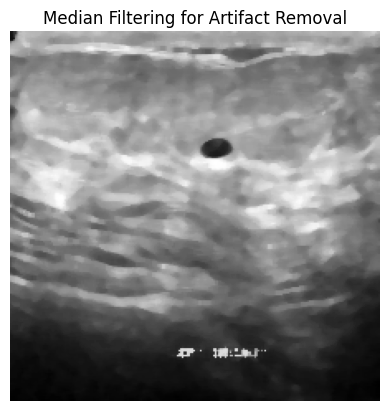

In [10]:
#### Artifact Removal - Median Filtering
def median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Example for early phase
median_filtered_img = median_filter(critical_phase_images[0])
plt.imshow(median_filtered_img, cmap='gray')
plt.title('Median Filtering for Artifact Removal')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Morphological Operations (Opening and closing)</h2>

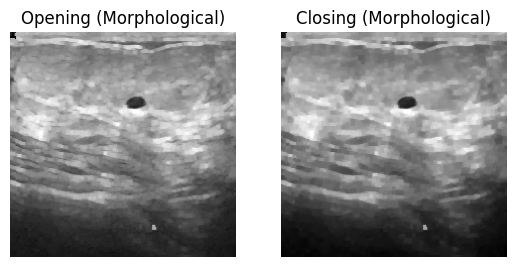

In [11]:
#### Morphological Operations - Opening and Closing
def morphological_operations(image):
    # Apply Opening (erosion followed by dilation)
    opened_img = opening(image, square(3))
    # Apply Closing (dilation followed by erosion)
    closed_img = closing(opened_img, square(3))
    return opened_img, closed_img

# Example for early phase
opened_img, closed_img = morphological_operations(critical_phase_images[0])

plt.subplot(1, 2, 1)
plt.imshow(opened_img, cmap='gray')
plt.title('Opening (Morphological)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closed_img, cmap='gray')
plt.title('Closing (Morphological)')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Feature Extraction - (Histogram of Oriented Gradients(HOG)</h2>

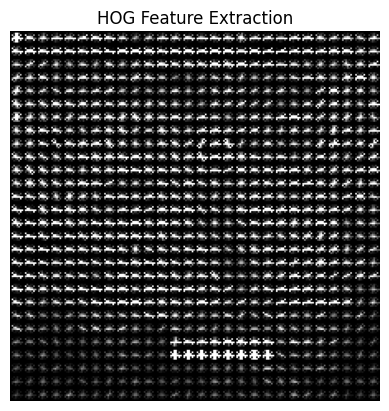

In [12]:
#### Feature Extraction - Histogram of Oriented Gradients (HOG)
def extract_hog_features(image):
    # Compute HOG features and visualize them
    features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

# Example for early phase
hog_img = extract_hog_features(critical_phase_images[0])
plt.imshow(hog_img, cmap='gray')
plt.title('HOG Feature Extraction')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Image Segmentation (Thresholding (Otsu's Method)</h2>

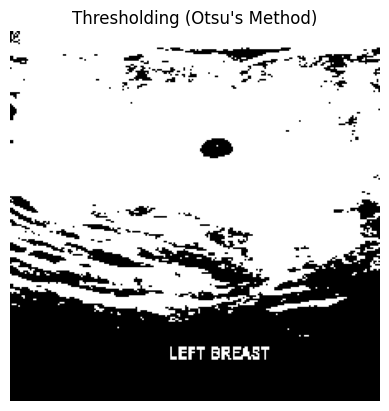

In [13]:
#### Image Segmentation - Thresholding (Otsu's Method)
def otsu_thresholding(image):
    _, thresholded_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded_img

# Example for early phase
thresholded_img = otsu_thresholding(critical_phase_images[0])
plt.imshow(thresholded_img, cmap='gray')
plt.title('Thresholding (Otsu\'s Method)')
plt.axis('off')
plt.show()

<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h3 style="text-align: center;">Evaluation Matrices (PSNR (Peak Signal-to-noise Ratio) , SSIM (Structural Similarity Index)</h3>

In [14]:
#### Evaluation - PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(original, enhanced):
    return cv2.PSNR(original, enhanced)

# Example for early phase
psnr_value = calculate_psnr(critical_phase_images[0], gaussian_smoothed_img)
print(f'PSNR: {psnr_value} dB')

#### Evaluation - SSIM (Structural Similarity Index)
def calculate_ssim(original, enhanced, data_range=255):
    # Convert the images to float32 for SSIM calculation
    original_float = original.astype('float32')
    enhanced_float = enhanced.astype('float32')
    
    # Compute SSIM between the original and enhanced images
    ssim_value, _ = ssim(original_float, enhanced_float, data_range=data_range, full=True)
    return ssim_value

# Example for early phase
ssim_value = calculate_ssim(critical_phase_images[0], gaussian_smoothed_img)
print(f'SSIM: {ssim_value}')

PSNR: 26.84111354464264 dB
SSIM: 0.8455749998252371


<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h3 style="text-align: center;">Interactive Block Diagram of the workflow</h3>

In [15]:
import plotly.graph_objects as go

# Define blocks and their connections in the diagram
blocks = [
    "Image Input",
    "Python Libraries\n(Numpy, OpenCV, Matplotlib, TensorFlow, scikit-image)",
    "Preprocessing Techniques\n(Resizing, Grayscale Conversion)",
    "Noise Reduction\n(Gaussian Smoothing, Median Filtering, Bilateral Filtering)",
    "Contrast Enhancement\n(Histogram Equalization, CLAHE, Contrast Stretching)",
    "Edge Sharpening\n(Laplacian Sharpening, Unsharp Masking, High-Boost Filtering)",
    "Deblurring Techniques\n(Wiener Filtering, Richardson-Lucy Deconvolution)",
    "Artifact Removal\n(Inpainting, Morphological Closing)",
    "Feature Extraction\n(HOG)",
    "Image Segmentation\n(Thresholding)",
    "Evaluation Metrics\n(PSNR, SSIM)",
    "Enhanced Image Output"
]

# Define the connections between blocks
connections = [
    ("Image Input", "Python Libraries\n(Numpy, OpenCV, Matplotlib, TensorFlow, scikit-image)"),
    ("Python Libraries\n(Numpy, OpenCV, Matplotlib, TensorFlow, scikit-image)", "Preprocessing Techniques\n(Resizing, Grayscale Conversion)"),
    ("Preprocessing Techniques\n(Resizing, Grayscale Conversion)", "Noise Reduction\n(Gaussian Smoothing, Median Filtering, Bilateral Filtering)"),
    ("Noise Reduction\n(Gaussian Smoothing, Median Filtering, Bilateral Filtering)", "Contrast Enhancement\n(Histogram Equalization, CLAHE, Contrast Stretching)"),
    ("Contrast Enhancement\n(Histogram Equalization, CLAHE, Contrast Stretching)", "Edge Sharpening\n(Laplacian Sharpening, Unsharp Masking, High-Boost Filtering)"),
    ("Edge Sharpening\n(Laplacian Sharpening, Unsharp Masking, High-Boost Filtering)", "Deblurring Techniques\n(Wiener Filtering, Richardson-Lucy Deconvolution)"),
    ("Deblurring Techniques\n(Wiener Filtering, Richardson-Lucy Deconvolution)", "Artifact Removal\n(Inpainting, Morphological Closing)"),
    ("Artifact Removal\n(Inpainting, Morphological Closing)", "Feature Extraction\n(HOG)"),
    ("Feature Extraction\n(HOG)", "Image Segmentation\n(Thresholding)"),
    ("Image Segmentation\n(Thresholding)", "Evaluation Metrics\n(PSNR, SSIM)"),
    ("Evaluation Metrics\n(PSNR, SSIM)", "Enhanced Image Output")
]

# Adjust vertical spacing factor
spacing = 0.1  # Increase spacing between blocks

# Create figure and add block nodes
fig = go.Figure()

for block in blocks:
    fig.add_trace(go.Scatter(
        x=[0.5],
        y=[1.0 - spacing * blocks.index(block)],  # Adjust spacing here
        mode="markers+text",
        marker=dict(size=50, color="lightblue"),
        text=block,
        textposition="middle center",
        hoverinfo="text",
        textfont=dict(size=10)
    ))

# Add arrows for connections
for start, end in connections:
    start_index = blocks.index(start)
    end_index = blocks.index(end)

    fig.add_annotation(
        ax=0.5,
        ay=1.0 - spacing * start_index,
        x=0.5,
        y=1.0 - spacing * end_index,
        xref="x", yref="y",
        axref="x", ayref="y",
        showarrow=True,
        arrowhead=2
    )

# Customize layout
fig.update_layout(
    title="Image Processing Workflow for Breast Tumor Enhancement",
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    showlegend=False,
    plot_bgcolor="white",
    height=900,  # Increased height for spacing
)

fig.show()

# Save the plot as an interactive .html file
fig.write_html("interactive_block_diagram.html")


<div style="background-color: #d9f0ff; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif; color: #000;">

<h2 style="text-align: center;">Conclusion</h2>

<p>In conclusion, the selected image processing techniques, particularly <strong>Gaussian Smoothing</strong> 🌊 and <strong>Unsharp Masking</strong> 🖼️, proved highly effective in enhancing image clarity and diagnostic quality for breast tumor imaging.</p>

<p><strong>Noise Reduction</strong> 🌊❌ and <strong>Contrast Enhancement</strong> 🌞📊 methods preserved critical tumor details, improving diagnostic accuracy, especially in low-quality scans. Consistent use of evaluation metrics like <strong>PSNR</strong> 📈 and <strong>SSIM</strong> 📊 provided objective assessments, ensuring reliable comparisons across all stages.</p>

<p>The challenges of dataset imbalance and scarcity highlighted opportunities for <strong>Data Augmentation</strong> 🔄 and <strong>Transfer Learning</strong> 🤖, paving the way for advancements in medical imaging. Findings from this project also lay the groundwork for automated phase classification and integration of <strong>Machine Learning</strong> 🤖 models, which could enable early tumor detection and support preventive care.</p>

<p>The techniques demonstrated here have potential applications beyond breast tumor imaging, offering valuable insights for other types of medical imaging and cancer detection. 💡</p>

</div>
